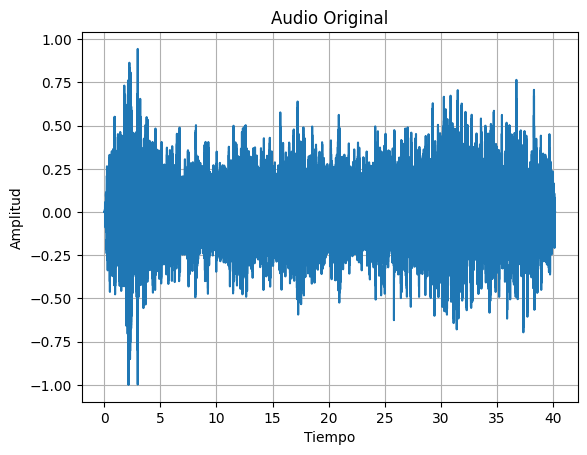

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read
import math

file = 'audio.wav'
fs, x = read(file) #leo y extraigo frec y amplitud


# Convierte de stereo a mono
x = x[:, 1]

# Calcula el valor absoluto máximo
abs_max = np.max(np.abs(x))

# Normaliza la señal dividiendo por el valor absoluto máximo
x = x / float(abs_max)

# Resto de tu código
x = x - np.mean(x)  # Normaliza señal

# Vector tiempo (ajustado)
t = np.arange(0, len(x) / fs, 1 / fs)
t = t[:len(x)]  # Redondear la longitud de t


plt.plot(t,x)
plt.title('Audio Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
Audio(x, rate=fs) #escucho el audio


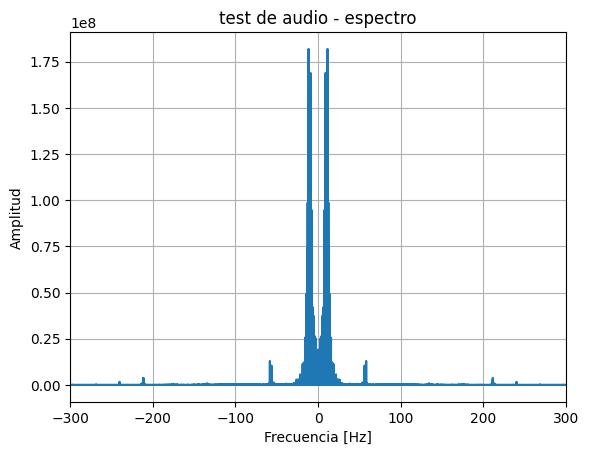

In [ ]:
X = np.fft.fft(x)
X_freq=np.fft.fftfreq(len(x)) * fs
plt.plot(X_freq, abs(X)**2)
plt.title('test de audio - espectro')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.xlim([-300, 300])
plt.grid()
plt.show()

<ipython-input-3-3b6ec847ea57>:42: RuntimeWarning: invalid value encountered in divide
  hx =(wc1/np.pi) *np.sin(wc1*n)/(wc1*n)
<ipython-input-3-3b6ec847ea57>:69: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  win=signal.blackman(len(hx))        #Blackman


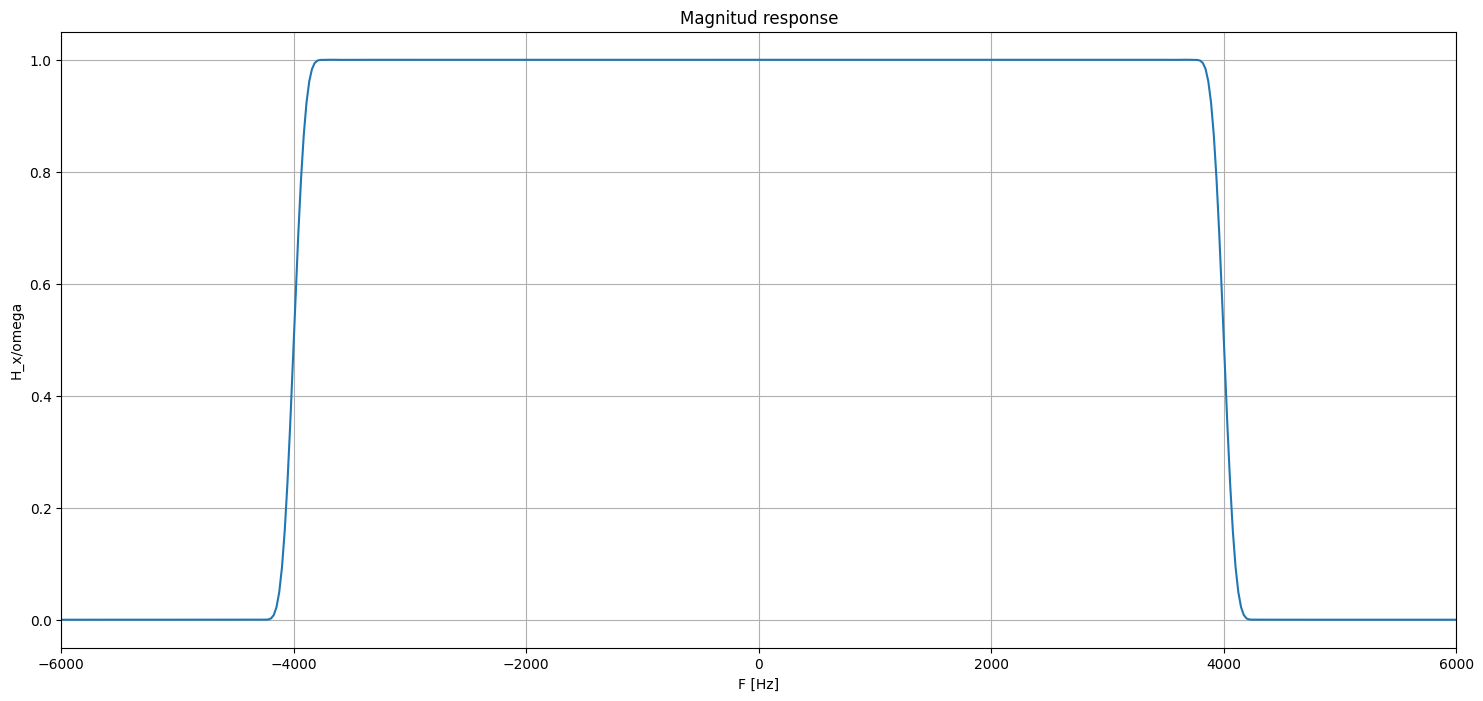

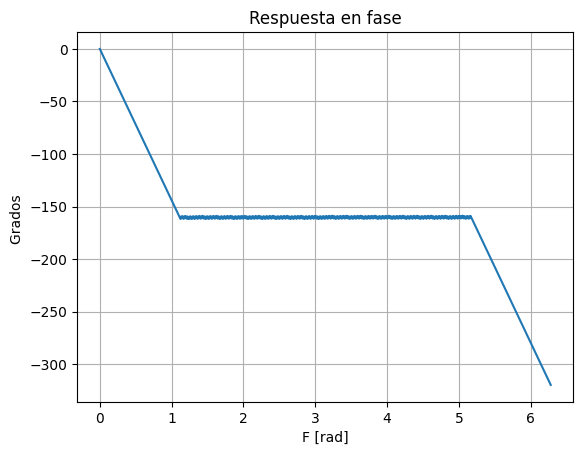

In [ ]:
#parametros del filtro (los va a ingresar el usuario)

fc1= 4000
fc2= 2000
ripple=0.003
BWtrans=500
Adb= 0
#fs= 16000
ftype = 'pasabajas'
ventana = 'recomendado'

#normalizo frecuencias y datos

wc1 = (2*np.pi*fc1)/fs
wc2 = (2*np.pi*fc2)/fs
bwn = (2*np.pi*BWtrans)/fs
rdb=20*np.log10(ripple)

#escoge tamaño del filtro

if(rdb>=-13):             #rectangular
  M=((4*np.pi)/bwn) -1
elif (rdb>=-25):          #Triangular
  M=(8*np.pi)/bwn
elif (rdb>=-31):
  M=(8*np.pi)/bwn         #Hann
elif (rdb>=-41):
  M=(8*np.pi)/bwn         #Hamming
else:
  M=(12*np.pi)/bwn        #Blackman

M=math.ceil(M)

if(M%2==0) :
  M+=1

n=np.arange(int(-M/2),int(M/2 + 1))

#Determinamos el tipo de filtro a usar

if(ftype=='pasabajas'):
  hx =(wc1/np.pi) *np.sin(wc1*n)/(wc1*n)
  hx[int(M/2)] = (wc1/np.pi)

elif(ftype == 'pasaaltas'):
  hx = -(wc1/np.pi) *np.sin(wc1*n)/(wc1*n)
  hx[int(M/2)] = 1-(wc1/np.pi)

elif(ftype == 'pasabandas'):
  hx = ((wc2/np.pi)*np.sin(n*wc2)) / (n*wc2) - ((wc1/np.pi)*np.sin(n*wc1)) / (n*wc1)
  hx[int(M/2)] = (1/np.pi)*(wc2-wc1)

elif(ftype == 'rechazabandas'):
  hx = ((wc1/np.pi)*np.sin(n*wc1)) / (n*wc1) - ((wc2/np.pi)*np.sin(n*wc2)) / (n*wc2)
  hx[int(M/2)] = 1-((1/np.pi)*(wc2-wc1))

#Determinamos la ventana

if(ventana=='recomendado'):
  if(rdb>=-13):             #rectangular
    win=np.ones(len(hx))
  elif (rdb>=-25):          #Triangular
    win=signal.triang(len(hx))
  elif (rdb>=-31):
    win=signal.hann(len(hx))        #Hann
  elif (rdb>=-41):
    win=signal.hamming(len(hx))         #Hamming
  else:
    win=signal.blackman(len(hx))        #Blackman
elif(ventana=='hamming'):
  win=signal.hamming(len(hx))
elif(ventana=='hann'):
  win=signal.hann(len(hx))
elif(ventana=='square'):
  win=signal.ones(len(hx))
elif(ventana=='blackman'):
  win=signal.blackman(len(hx))
elif(ventana=='bartlett'):
  win=signal.triang(len(hx))

#salida del filtro

hn = hx*win
A = np.sqrt(10**(0.1*Adb))
hn = hn*A

w_win,H_win = signal.freqz(hn,1,whole=True, worN=1024)

#calculo componentes del filtro y grafico
plt.figure(figsize=(18, 8))
plt.plot((w_win-np.pi)*fs/(2*np.pi), np.abs(np.fft.fftshift(H_win)))
plt.xlim(-fc1-2000, fc1+2000)
plt.xlabel('F [Hz]')
plt.ylabel('H_x/omega')
plt.title('Magnitud response')
plt.grid()
plt.show()

angles=np.unwrap(np.angle(H_win))
plt.figure()
plt.plot(w_win,angles)
plt.xlabel('F [rad]')
plt.ylabel('Grados ')
plt.title('Respuesta en fase')
plt.grid()
plt.show()


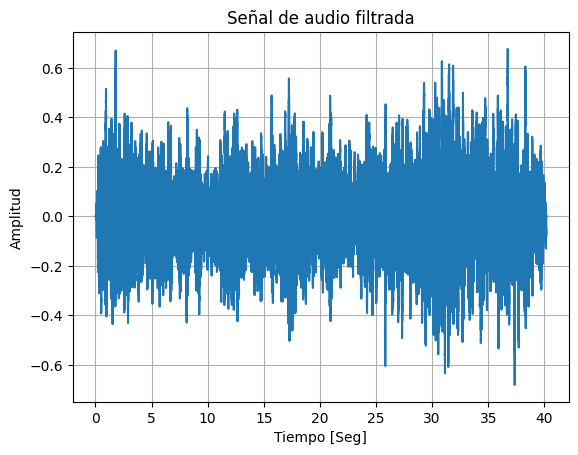

In [ ]:
y =signal.lfilter(hn,1,x)
#plt.figure(figsize=[18,8])
plt.plot(t,y)
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud')
plt.title('Señal de audio filtrada')
plt.grid()
plt.show()

Audio(y, rate=fs) #escucho el audio

FILTROS FIR POR EL METODO DE MUESTREO EN FRECUENCIA


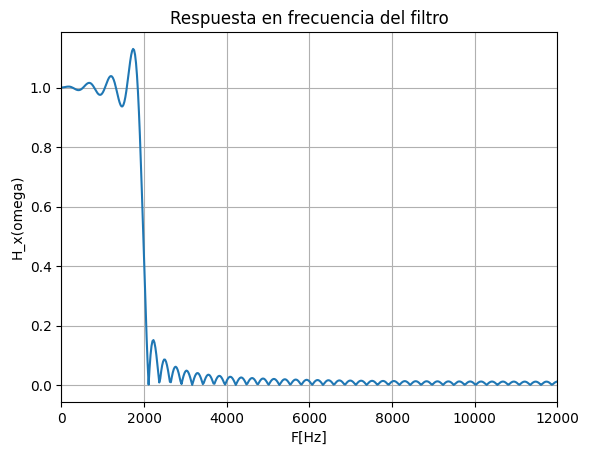

In [ ]:

# Parámetros
N = 91
fc1 = 2000
fc2 = 10000
ftype = 'pasabajas'
fs = 24000  # Frecuencia de muestreo

# Número de muestras y tamaño del paso
if N % 2 != 0:
    limit = (N - 1) // 2
else:
    limit = N // 2 - 1

# Tamaño Paso
fk = fs / N
samples = [i if N % 2 else i + 0.5 for i in range(limit + 1)]
hk = []

if ftype == 'pasabajas':
    hk = [1 if fk * i <= fc1 else 0 for i in samples]
elif ftype == 'pasaaltas':
    hk = [0 if fk * i <= fc1 else 1 for i in samples]
elif ftype == 'pasabandas':
    hk = [0 if (fk * i <= fc1 or fk * i >= fc2) else 1 for i in samples]
elif ftype == 'rechazabanda':
    hk = [0 if (fk * i >= fc1 and fk * i <= fc2) else 1 for i in samples]

# Obtengo los coeficientes positivos del filtro (IFT)
alfa = (N - 1) / 2

hn = np.zeros(limit + 1)
for n in range(limit + 1):
    acc = 0
    for k in range(1, limit + 1):
        acc += 2 * hk[k] * np.cos((2 * np.pi * k * (n - alfa)) / N)
    acc = (1 / N) * (acc + hk[0])
    hn[n] = acc

# Completo los coeficientes (simetría y fase lineal)
if N % 2 != 0:
    htemp = np.flip(hn[:-1])
else:
    htemp = np.flip(hn)

h = np.concatenate((hn, htemp))
W, H = signal.freqz(h, 1, whole=True, worN=1024)

# Salida del filtro
plt.plot((W - np.pi) * fs / (2 * np.pi), np.abs(np.fft.fftshift(H)))
plt.xlim(0, fs / 2)  # Ajuste el límite del eje x a la mitad del rango
plt.xlabel('F[Hz]')
plt.ylabel('H_x(omega)')
plt.title('Respuesta en frecuencia del filtro')
plt.grid()
plt.show()



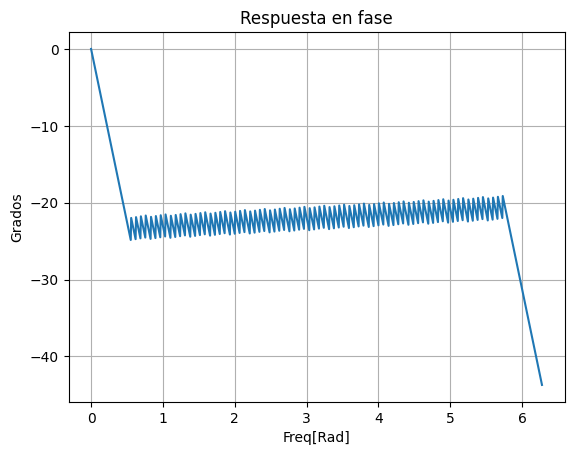

In [ ]:
angles = np.unwrap(np.angle(H))
plt.plot(W,angles)
plt.xlabel('Freq[Rad]')
plt.ylabel('Grados')
plt.title('Respuesta en fase')
plt.grid()
plt.show()


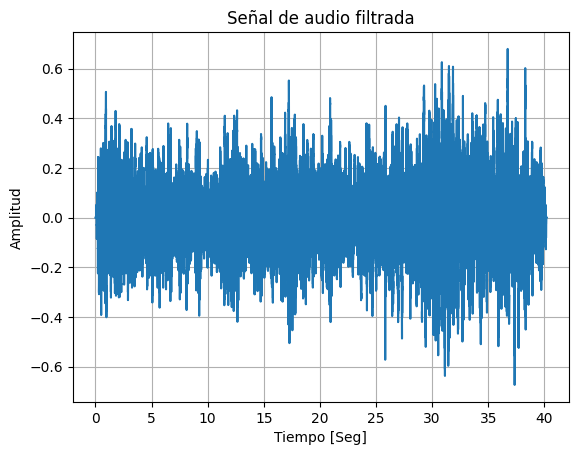

In [ ]:
y =signal.lfilter(h,1,x)
#plt.figure(figsize=[18,8])
plt.plot(t,y)
plt.xlabel('Tiempo [Seg]')
plt.ylabel('Amplitud')
plt.title('Señal de audio filtrada')
plt.grid()
plt.show()

Audio(y, rate=fs) #escucho el audio